In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas import Series,DataFrame

****1.EDA of data****

In [3]:
#load data
gender_sub_df = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
train_df1 = pd.read_csv('/kaggle/input/titanic/train.csv')
#data to play with 
train_df = train_df1.copy(deep=True)
data_cleaner = [train_df,test_df]

In [4]:
# A quick and dirty overview of the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
69,70,0,3,"Kink, Mr. Vincenz",male,26.00,2,0,315151,8.6625,NaN,S
785,786,0,3,"Harmer, Mr. Abraham (David Lishin)",male,25.00,0,0,374887,7.2500,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.00,0,0,PC 17477,69.3000,B35,C
684,685,0,2,"Brown, Mr. Thomas William Solomon",male,60.00,1,1,29750,39.0000,NaN,S
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.00,0,0,248747,13.0000,NaN,S
492,493,0,1,"Molson, Mr. Harry Markland",male,55.00,0,0,113787,30.5000,C30,S
546,547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.00,1,0,2908,26.0000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
20,21,0,2,"Fynney, Mr. Joseph J",male,35.00,0,0,239865,26.0000,NaN,S


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.describe(include=['O']) #categorical feature

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Aks, Mrs. Sam (Leah Rosen)",male,1601,G6,S
freq,1,577,7,4,644


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

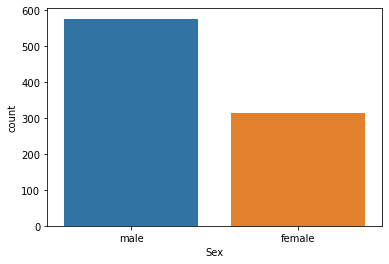

In [8]:
#Exploration of the passengers age,gender,class
#Check data distribution in Sex column
sns.countplot('Sex',data=train_df)

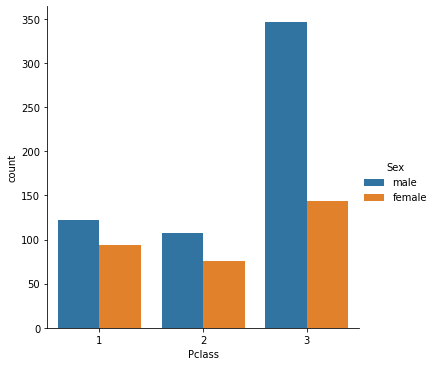

In [9]:
sns.catplot(x="Pclass",kind='count',data=train_df,hue="Sex")

In [10]:
def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex
    
train_df['person'] = train_df[['Age','Sex']].apply(male_female_child,axis=1)

In [11]:
train_df['person'].unique()

array(['male', 'female', 'child'], dtype=object)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


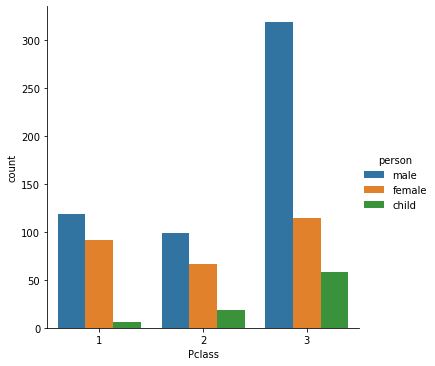

In [12]:
sns.catplot('Pclass',kind='count',data=train_df,hue='person')

Most of the children are in 3rd class. We could creat a distribution of the ages to get a more precise picture of the passengers

<AxesSubplot:>

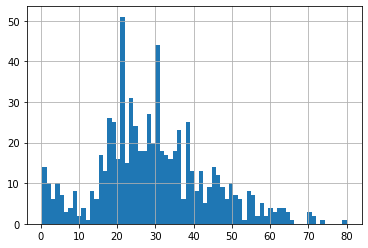

In [13]:
train_df['Age'].hist(bins=70)

The majority of passengers are around 20-30 years old.

In [14]:
train_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

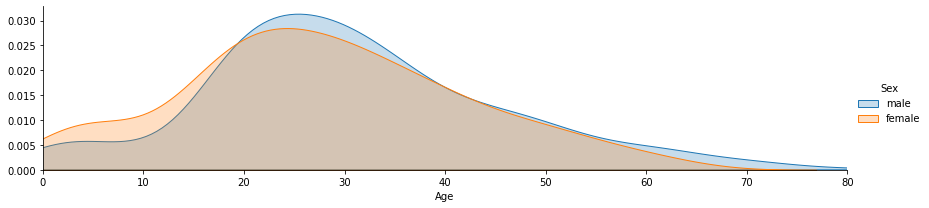

In [15]:
fig = sns.FacetGrid(train_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=train_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

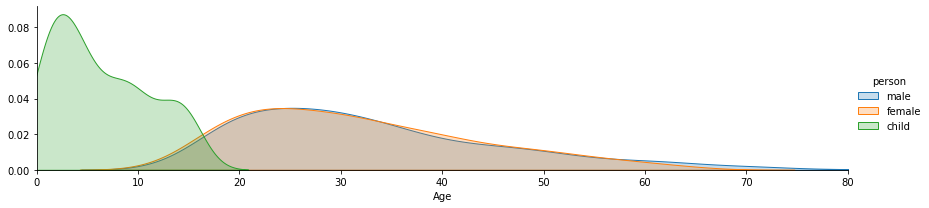

In [16]:
fig=sns.FacetGrid(train_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=train_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

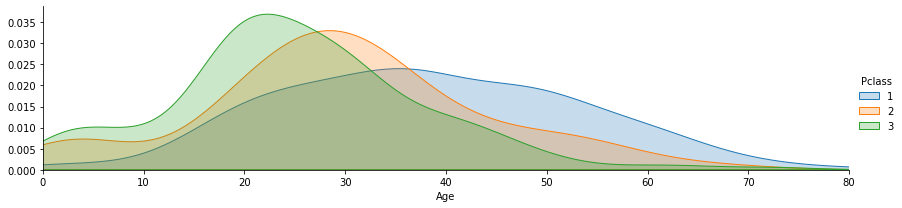

In [17]:
fig = sns.FacetGrid(train_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=train_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

**2. Deck of the passengers**

In [18]:
deck_train_df=train_df['Cabin'].dropna()

In [19]:
deck_train_df.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


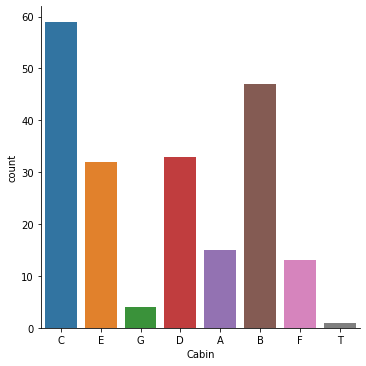

In [20]:
#Use the first letter to classify the level
levels=[]
for level in deck_train_df:
    levels.append(level[0])
    
cabin_train_df = DataFrame(levels)
cabin_train_df.columns=['Cabin']
sns.catplot('Cabin',kind='count',data=cabin_train_df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


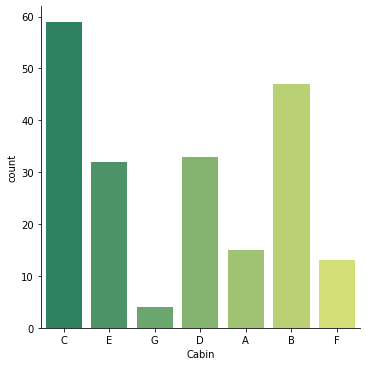

In [21]:
cabin_train_df=cabin_train_df[cabin_train_df.Cabin != 'T']
sns.catplot('Cabin',kind='count',data=cabin_train_df,palette='summer')

**3.Where did the passengers come from?**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


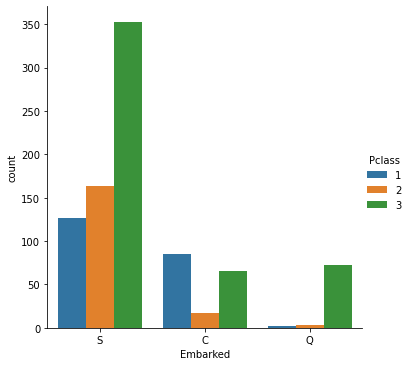

In [22]:
sns.catplot('Embarked',kind='count',data=train_df,hue='Pclass',row_order=['S','Q','C'])

**4.Who was alone or with family?**

In [23]:
train_df['Alone'] = train_df.Parch + train_df.SibSp
train_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [24]:
train_df['Alone'].loc[train_df['Alone']>0] = 'With Family'
train_df['Alone'].loc[train_df['Alone']==0] = 'Alone'


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


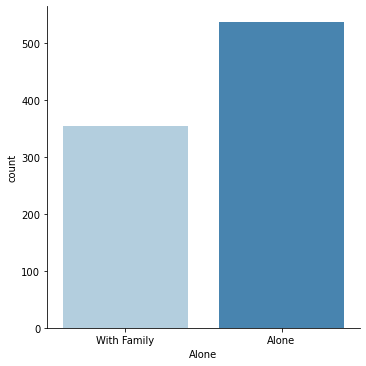

In [25]:
sns.catplot('Alone',kind='count',data=train_df,palette='Blues')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


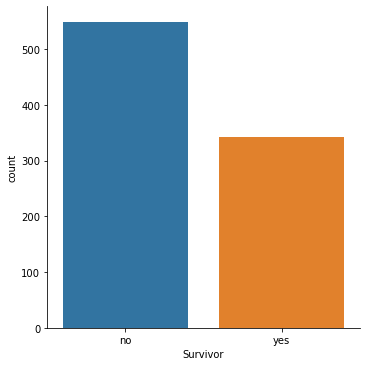

In [26]:
#creat a new column for survived
train_df['Survivor']=train_df.Survived.map({0:'no',1:'yes'})
sns.catplot('Survivor',kind='count',data=train_df)

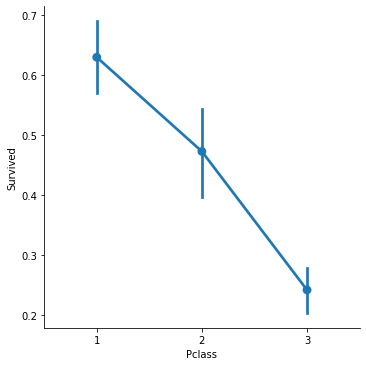

In [27]:
sns.catplot(x='Pclass',y='Survived',kind='point',data=train_df)

Survival rate for the 3rd class are lower. The reason might be the large amount of men in the 3rd class.

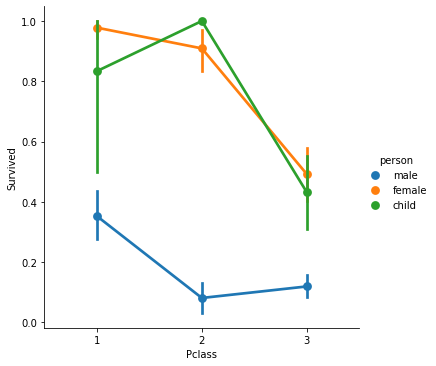

In [28]:
sns.catplot(x='Pclass',y='Survived',kind='point',data=train_df,hue='person')

The figure shows being a male or being in the 3rd class were both not survival regardless of class. Then we want to check the relationship between age and survival rate.


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


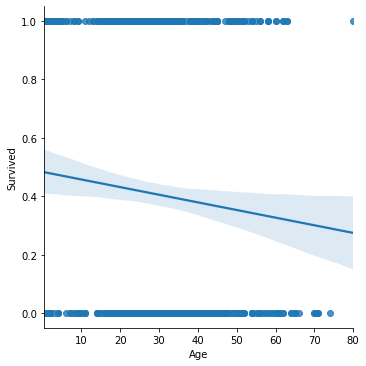

In [29]:
#generate a liner plot on age versus survival
sns.lmplot('Age','Survived',data=train_df)

Looks like there is a general trend that the older the passenger was, the less likely they survived.


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


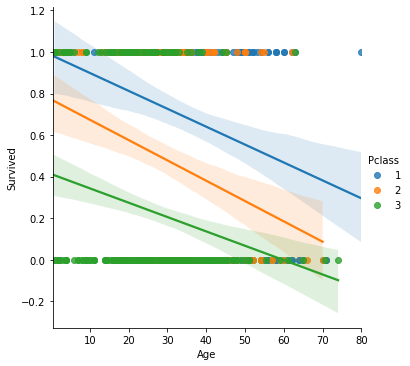

In [30]:
#check the liner plot on age versus survival using hue for class 
sns.lmplot('Age','Survived',hue='Pclass',data=train_df)

****2.Clean Data****

In [31]:
train_df.drop(['person','Alone','Survivor'],axis=1,inplace=True)

In [32]:
# fill Age with median value
print('Missing for age in train_data: '+str(train_df['Age'].isnull().sum()))
print('Missing in persentage: '+str(round(train_df['Age'].isnull().sum()/len(train_df)*100.0))+'%')


Missing for age in train_data: 177
Missing in persentage: 20%


In [33]:
#We will replace the missing age values with median of age
train_df['Age'] = train_df.groupby(['Pclass','Sex'])['Age'].apply(lambda x: x.fillna(x.median()))
test_df['Age'] = train_df.groupby(['Pclass','Sex'])['Age'].apply(lambda x: x.fillna(x.median()))

In [34]:
print('Missing for age in all data: '+str(train_df['Age'].isnull().sum()))

Missing for age in all data: 0


In [35]:
# fill Embarked with mode, fill fare missing value with median
for dataset in data_cleaner:
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0],inplace = True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

In [36]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [37]:
#For cabin feature, just drop it
drop_column = ['PassengerId','Cabin','Ticket']
train_df.drop(drop_column, axis=1, inplace = True )
print(train_df.isnull().sum())
print(test_df.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [38]:
#Family size-SibSp and parch
for dataset in data_cleaner:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 
    
#Creat Title feature according to name column
    dataset['Title'] = dataset['Name'].str.split(", ",expand=True)[1].str.split(".", expand=True)[0]
    
#Discretize fare into bins using qcut(based on sample quantiles)
    dataset['FareBin'] = pd.qcut(dataset['Fare'],4)
    
#Discretize age into bins using cut(base on values)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [39]:
#cleanup rare title names
print(train_df['Title'].value_counts())

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Lady              1
Sir               1
Mme               1
Jonkheer          1
the Countess      1
Don               1
Ms                1
Capt              1
Name: Title, dtype: int64


In [40]:
title_names = (train_df['Title'].value_counts()<10)
#This will creat a boolean series with title name as index
train_df['Title'] = train_df['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(train_df['Title'].value_counts())

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64


In [41]:
#Let's compare the original dataset and the cleaning dataset
train_df.info()
print("-"*100)
train_df1.info()
print("-"*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
 13  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.9+ KB
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeInd

In [42]:
train_df.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
298,1,1,"Saalfeld, Mr. Adolphe",male,40.0,0,0,30.5000,S,1,1,Mr,"(14.454, 31.0]","(32.0, 48.0]"
340,1,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,26.0000,S,3,0,Master,"(14.454, 31.0]","(-0.08, 16.0]"
512,1,1,"McGough, Mr. James Robert",male,36.0,0,0,26.2875,S,1,1,Mr,"(14.454, 31.0]","(32.0, 48.0]"
70,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,10.5000,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
672,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,10.5000,S,1,1,Mr,"(7.91, 14.454]","(64.0, 80.0]"
405,0,2,"Gale, Mr. Shadrach",male,34.0,1,0,21.0000,S,2,0,Mr,"(14.454, 31.0]","(32.0, 48.0]"
881,0,3,"Markun, Mr. Johann",male,33.0,0,0,7.8958,S,1,1,Mr,"(-0.001, 7.91]","(32.0, 48.0]"
65,1,3,"Moubarek, Master. Gerios",male,25.0,1,1,15.2458,C,3,0,Master,"(14.454, 31.0]","(16.0, 32.0]"
42,0,3,"Kraeff, Mr. Theodor",male,25.0,0,0,7.8958,C,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
688,0,3,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,7.7958,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"


In [43]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [44]:
#Convert objects to category using Label Encoder #Encode target labels with value between 0 and n_classes-1.
label = LabelEncoder()
for dataset in data_cleaner:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])#standardscalar the data
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])
    
Target = ['Survived']


    

#for dataset in combine:
    #dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

#train_df.head()

In [45]:
#feature selection--define x variables for original features 
train_df_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
train_df_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
train_df_xy =  Target + train_df_x
print('Original X Y: ', train_df_xy, '\n')

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 



In [46]:
#define x variables for original bin features to remove continuous variables
train_df_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
train_df_xy_bin = Target + train_df_x_bin
print('Bin X Y: ', train_df_xy_bin, '\n')

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 



In [47]:
#define x and y variables for dummy features original
train_df_dummy = pd.get_dummies(train_df[train_df_x])
train_df_x_dummy = train_df_dummy.columns.tolist()
train_df_xy_dummy = Target + train_df_x_dummy
print('Dummy X Y: ',train_df_xy_dummy, '\n')

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



In [48]:
train_df_dummy.head()

,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


**3.Machine learning**

In [49]:
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

In [50]:
train_df_x_dummy

['Pclass',
 'SibSp',
 'Parch',
 'Age',
 'Fare',
 'FamilySize',
 'IsAlone',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Title_Master',
 'Title_Misc',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs']

In [51]:
#Split the data into training and testing data

train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(train_df[train_df_x_calc], train_df[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(train_df[train_df_x_bin], train_df[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(train_df_dummy[train_df_x_dummy], train_df[Target], random_state = 0)

In [52]:
#Machine learning algorithm selection

MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: 
    XGBClassifier()    
    ]

In [53]:
#split the dataset in cross-validation
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )
#run model 10x with 60/30 split intentionally leaving out 10%

#creat table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD','MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

MLA_predict = train_df[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:
    
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    cv_results = model_selection.cross_validate(alg, train_df[train_df_x_bin], train_df[Target], cv  = cv_split)
    
    print(cv_results)
    print('--------------------')
    
    
    #MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    
    
    alg.fit(train_df[train_df_x_bin], train_df[Target])
    MLA_predict[MLA_name] = alg.predict(train_df[train_df_x_bin])
    
    row_index+=1

MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

{'fit_time': array([0.09504795, 0.09025526, 0.09335017, 0.09084463, 0.09031892,
       0.09074879, 0.09099197, 0.09032297, 0.09231925, 0.09225821]), 'score_time': array([0.01122522, 0.01225042, 0.01227498, 0.01289916, 0.01101327,
       0.01110435, 0.0110631 , 0.01122689, 0.0112865 , 0.0110147 ]), 'test_score': array([0.81716418, 0.79104478, 0.80970149, 0.79104478, 0.83955224,
       0.82089552, 0.79477612, 0.80223881, 0.83955224, 0.84328358])}
--------------------


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d arra

{'fit_time': array([0.02971053, 0.02961755, 0.03123856, 0.03021383, 0.03104281,
       0.03215337, 0.03039312, 0.0304389 , 0.03044009, 0.03014374]), 'score_time': array([0.0038538 , 0.00387263, 0.00393081, 0.00388503, 0.00397086,
       0.00408888, 0.00395083, 0.00475073, 0.00387311, 0.00389361]), 'test_score': array([0.82462687, 0.80597015, 0.80597015, 0.81716418, 0.83208955,
       0.80223881, 0.79850746, 0.80223881, 0.80597015, 0.86940299])}
--------------------


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 

{'fit_time': array([0.15770864, 0.14980054, 0.15171361, 0.15009904, 0.15125084,
       0.14951229, 0.15042973, 0.14922142, 0.15051293, 0.1512897 ]), 'score_time': array([0.01760864, 0.01567054, 0.0157032 , 0.01580715, 0.01599622,
       0.01587987, 0.01571393, 0.01564145, 0.01589727, 0.01619363]), 'test_score': array([0.84328358, 0.82462687, 0.82462687, 0.80597015, 0.83208955,
       0.83208955, 0.79477612, 0.78731343, 0.79477612, 0.87313433])}
--------------------


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d arra

{'fit_time': array([0.08820915, 0.08698678, 0.08660626, 0.08470106, 0.08497429,
       0.08576083, 0.08428621, 0.08681202, 0.0872519 , 0.08809114]), 'score_time': array([0.00318956, 0.00306082, 0.0029757 , 0.00310516, 0.0030396 ,
       0.00420833, 0.00310493, 0.00312448, 0.00305986, 0.00311828]), 'test_score': array([0.83955224, 0.80223881, 0.82835821, 0.80597015, 0.8358209 ,
       0.82089552, 0.80597015, 0.82089552, 0.82089552, 0.8619403 ])}
--------------------


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 

{'fit_time': array([0.20149875, 0.1992979 , 0.19895339, 0.20025539, 0.20087385,
       0.20034742, 0.19893336, 0.19922566, 0.20172691, 0.20219612]), 'score_time': array([0.01641822, 0.01645565, 0.01790237, 0.0170579 , 0.01669955,
       0.01661515, 0.01662874, 0.01675153, 0.01740909, 0.01651692]), 'test_score': array([0.85447761, 0.81716418, 0.81716418, 0.80223881, 0.84328358,
       0.82835821, 0.79104478, 0.79477612, 0.80970149, 0.88432836])}
--------------------


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

{'fit_time': array([0.1779213 , 0.18041492, 0.17944622, 0.18373299, 0.17709184,
       0.17693853, 0.177176  , 0.18410969, 0.17982554, 0.18241739]), 'score_time': array([0.01378393, 0.01444149, 0.01463628, 0.01419139, 0.0139246 ,
       0.01401973, 0.0139606 , 0.01405692, 0.01427388, 0.01426983]), 'test_score': array([0.82835821, 0.79850746, 0.81343284, 0.80223881, 0.81716418,
       0.80597015, 0.77985075, 0.80223881, 0.80970149, 0.84328358])}
--------------------


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d arra

{'fit_time': array([0.24451876, 0.22589827, 0.22953343, 0.22625136, 0.26401043,
       0.22524762, 0.22912765, 0.21489787, 0.2257278 , 0.22416139]), 'score_time': array([0.00220871, 0.0021441 , 0.00218439, 0.00229859, 0.00240088,
       0.00213051, 0.00216699, 0.0021956 , 0.00225401, 0.00217056]), 'test_score': array([0.80597015, 0.76119403, 0.81716418, 0.75373134, 0.80970149,
       0.80597015, 0.76492537, 0.78731343, 0.80970149, 0.82462687])}
--------------------


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d arra

{'fit_time': array([0.00546718, 0.00435638, 0.00429726, 0.00437832, 0.00416589,
       0.00409842, 0.0041244 , 0.00401235, 0.00404716, 0.00382662]), 'score_time': array([0.00202107, 0.00195861, 0.00205278, 0.00196552, 0.00202346,
       0.0019691 , 0.00191283, 0.00202012, 0.00194287, 0.00187516]), 'test_score': array([0.73134328, 0.65298507, 0.80223881, 0.69402985, 0.43283582,
       0.73134328, 0.75746269, 0.75746269, 0.76865672, 0.77985075])}
--------------------
{'fit_time': array([0.01334834, 0.00667048, 0.00633717, 0.00672269, 0.00649333,
       0.00680852, 0.00653195, 0.00673795, 0.00659394, 0.00658035]), 'score_time': array([0.00230551, 0.0019083 , 0.00224066, 0.00201559, 0.00189877,
       0.00204468, 0.0020988 , 0.00197792, 0.0019927 , 0.00197601]), 'test_score': array([0.79477612, 0.78358209, 0.82089552, 0.7761194 , 0.80970149,
       0.79850746, 0.78358209, 0.78358209, 0.80223881, 0.80597015])}
--------------------


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

{'fit_time': array([0.0059576 , 0.00541353, 0.00573421, 0.00467324, 0.00519872,
       0.00574732, 0.00468898, 0.00549245, 0.00494719, 0.00612092]), 'score_time': array([0.00204277, 0.00193357, 0.00223279, 0.0020287 , 0.00191879,
       0.00196791, 0.00211692, 0.00200677, 0.00194836, 0.00191236]), 'test_score': array([0.69029851, 0.74253731, 0.75746269, 0.75      , 0.79850746,
       0.79850746, 0.73134328, 0.7761194 , 0.82835821, 0.78731343])}
--------------------
{'fit_time': array([0.00461221, 0.00408626, 0.00411725, 0.00430608, 0.0045805 ,
       0.00438118, 0.00422382, 0.0042212 , 0.00443125, 0.00423145]), 'score_time': array([0.00192547, 0.00183654, 0.00189137, 0.00195217, 0.00217724,
       0.00192237, 0.00186896, 0.00184059, 0.00199604, 0.0019443 ]), 'test_score': array([0.79477612, 0.75373134, 0.42910448, 0.75746269, 0.80970149,
       0.74626866, 0.75746269, 0.76492537, 0.74253731, 0.79104478])}
--------------------
{'fit_time': array([0.00404286, 0.00381565, 0.0038631 , 0.00

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

{'fit_time': array([0.00365758, 0.00340581, 0.00341392, 0.00414729, 0.00488591,
       0.00371575, 0.00360703, 0.00340319, 0.00335169, 0.00361347]), 'score_time': array([0.00211644, 0.00202322, 0.00231242, 0.00215578, 0.00308275,
       0.00209999, 0.00210929, 0.00203729, 0.0019784 , 0.00208664]), 'test_score': array([0.79477612, 0.7238806 , 0.80970149, 0.76119403, 0.80597015,
       0.76492537, 0.76492537, 0.75      , 0.79104478, 0.83208955])}
--------------------


/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

{'fit_time': array([0.00780535, 0.00541663, 0.00531888, 0.00536275, 0.00596452,
       0.00514412, 0.00541258, 0.00529146, 0.00523257, 0.00514984]), 'score_time': array([0.01387286, 0.01373386, 0.01325893, 0.01634002, 0.01355004,
       0.01344156, 0.01376128, 0.0133419 , 0.0133481 , 0.0149219 ]), 'test_score': array([0.8358209 , 0.79104478, 0.79850746, 0.78731343, 0.80970149,
       0.80970149, 0.80970149, 0.77238806, 0.82089552, 0.85074627])}
--------------------


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

{'fit_time': array([0.05705953, 0.05315304, 0.05825543, 0.05573511, 0.05530262,
       0.05251932, 0.05102921, 0.05377388, 0.05475116, 0.05959177]), 'score_time': array([0.00693893, 0.00671721, 0.00694036, 0.00652957, 0.00704384,
       0.00694823, 0.00676036, 0.00685811, 0.00698972, 0.00718069]), 'test_score': array([0.82462687, 0.81343284, 0.82089552, 0.82089552, 0.82835821,
       0.82089552, 0.82089552, 0.82089552, 0.8358209 , 0.8619403 ])}
--------------------


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d arra

{'fit_time': array([0.06727028, 0.06266212, 0.0668366 , 0.06566405, 0.06520438,
       0.06399035, 0.06472731, 0.06515145, 0.06529021, 0.06789899]), 'score_time': array([0.00753236, 0.00727344, 0.00738025, 0.00728154, 0.00724721,
       0.00724602, 0.0073812 , 0.0072    , 0.00734854, 0.0073936 ]), 'test_score': array([0.82089552, 0.80597015, 0.82089552, 0.81716418, 0.82835821,
       0.82835821, 0.81716418, 0.82089552, 0.83955224, 0.86567164])}
--------------------


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

{'fit_time': array([0.0303452 , 0.02735472, 0.02594662, 0.02599883, 0.02666879,
       0.02589464, 0.0267961 , 0.02666092, 0.02652526, 0.02691054]), 'score_time': array([0.00270939, 0.00277305, 0.00273228, 0.00281763, 0.00274277,
       0.0028441 , 0.00314116, 0.00279927, 0.00270414, 0.00271797]), 'test_score': array([0.79850746, 0.77985075, 0.80970149, 0.76865672, 0.80970149,
       0.80223881, 0.77985075, 0.79104478, 0.80223881, 0.80970149])}
--------------------
{'fit_time': array([0.00487566, 0.00430727, 0.00436425, 0.00446796, 0.00442505,
       0.00430512, 0.00427079, 0.00433445, 0.00590897, 0.00446033]), 'score_time': array([0.00192189, 0.00203609, 0.00190616, 0.00195837, 0.00192785,
       0.00186753, 0.00186682, 0.00192809, 0.00203419, 0.00192928]), 'test_score': array([0.83208955, 0.81716418, 0.81716418, 0.81716418, 0.8358209 ,
       0.81343284, 0.79850746, 0.79477612, 0.77985075, 0.85447761])}
--------------------
{'fit_time': array([0.0042417 , 0.00427461, 0.00412369, 0.00

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

{'fit_time': array([0.00464392, 0.0043993 , 0.00431514, 0.00420976, 0.00437999,
       0.00413203, 0.00393057, 0.00400949, 0.00411153, 0.00443101]), 'score_time': array([0.00194693, 0.0020287 , 0.00190639, 0.00198531, 0.0019269 ,
       0.00190425, 0.00193191, 0.00187445, 0.00203395, 0.00207853]), 'test_score': array([0.79477612, 0.78358209, 0.82089552, 0.7761194 , 0.81343284,
       0.79850746, 0.78358209, 0.78358209, 0.80223881, 0.80597015])}
--------------------
{'fit_time': array([0.00539637, 0.00349593, 0.00362492, 0.00331688, 0.00338268,
       0.00328231, 0.00318623, 0.00343347, 0.00338411, 0.00331903]), 'score_time': array([0.00209498, 0.00212812, 0.0020678 , 0.00204706, 0.00205755,
       0.0019865 , 0.00200605, 0.00211644, 0.00207782, 0.00199914]), 'test_score': array([0.81716418, 0.76119403, 0.83208955, 0.7761194 , 0.82462687,
       0.82462687, 0.77985075, 0.80223881, 0.83208955, 0.84701493])}
--------------------
[20:06:34] WARNING: ../src/learner.cc:1061: Starting in XGBo

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; an

[20:06:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; an

[20:06:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; an

{'fit_time': array([0.09337783, 0.06351471, 0.06021214, 0.06103206, 0.06350136,
       0.06631804, 0.06265974, 0.061234  , 0.05962205, 0.06415606]), 'score_time': array([0.00345731, 0.00347304, 0.00347281, 0.0035646 , 0.00351167,
       0.00359893, 0.00352216, 0.0033927 , 0.00340557, 0.00346708]), 'test_score': array([0.83955224, 0.82462687, 0.82462687, 0.81716418, 0.84328358,
       0.81343284, 0.78358209, 0.80970149, 0.80970149, 0.86940299])}
--------------------
[20:06:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,MLA Name,MLA Parameters,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.826866,0.038842,0.055117
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.826493,0.046492,0.065470
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.824254,0.051893,0.086368
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.824254,0.083085,0.200331
21,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",0.823507,0.066234,0.065563
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.821269,0.074833,0.151154
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.816418,0.061271,0.030539
17,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.816045,0.061526,0.004572
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.814925,0.058424,0.091646
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.810075,0.049165,0.179907


In [54]:
MLA_compare


,MLA Name,MLA Parameters,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.826866,0.038842,0.055117
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.826493,0.046492,0.065470
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.824254,0.051893,0.086368
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.824254,0.083085,0.200331
21,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",0.823507,0.066234,0.065563
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.821269,0.074833,0.151154
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.816418,0.061271,0.030539
17,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.816045,0.061526,0.004572
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.814925,0.058424,0.091646
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.810075,0.049165,0.179907


Text(0, 0.5, 'Algorithm')

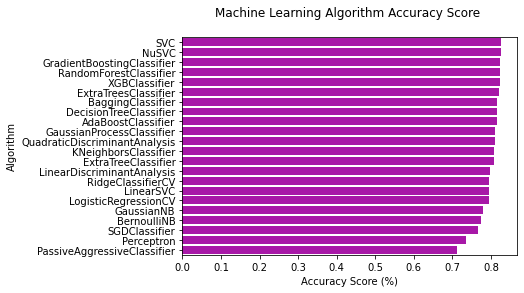

In [55]:
#barplot
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

**4.Evaluate Model Performance**

In [57]:
#base model-decision tree
dtree = tree.DecisionTreeClassifier(random_state = 0)
base_results = model_selection.cross_validate(dtree, train_df[train_df_x_bin], train_df[Target], cv = cv_split)
dtree.fit(train_df[train_df_x_bin], train_df[Target])

print('BEFORE DT Test w/bin score mean: {:.2f}'. format(base_results['test_score'].mean()*100))
print('------------------------------')

param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2,4,6,8,10,None], 'random_state':[0]} #Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled

tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)
tune_model.fit(train_df[train_df_x_bin], train_df[Target])
print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))

BEFORE DT Test w/bin score mean: 81.49
------------------------------
AFTER DT Test w/bin score mean: 87.39


In [58]:
#recursive feature elimination (RFE) with cross validation (CV)
dtree_rfe = feature_selection.RFECV(dtree, step = 1, scoring = 'accuracy', cv = cv_split)
dtree_rfe.fit(train_df[train_df_x_bin], train_df[Target])

X_rfe = train_df[train_df_x_bin].columns.values[dtree_rfe.get_support()]
rfe_results = model_selection.cross_validate(dtree, train_df[X_rfe], train_df[Target], cv  = cv_split)

print("AFTER DT RFE Test w/bin score mean: {:.2f}". format(rfe_results['test_score'].mean()*100))


AFTER DT RFE Test w/bin score mean: 81.49


In [ ]:
rfe_tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)
rfe_tune_model.fit(train_df[X_rfe],train_df[Target])
print("AFTER DT RFE Tuned Test w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))

In [59]:
#Hyperparameter Tune with GridSearchCV

grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]

grid_param = [
            [{
            #AdaBoostClassifier 
            'n_estimators': grid_n_estimator, #default=50
            'learning_rate': grid_learn, #default=1
            #'algorithm': ['SAMME', 'SAMME.R'], #default=’SAMME.R
            'random_state': grid_seed
            }],
       
    
            [{
            #BaggingClassifier 
            'n_estimators': grid_n_estimator, #default=10
            'max_samples': grid_ratio, #default=1.0
            'random_state': grid_seed
             }],

    
            [{
            #ExtraTreesClassifier 
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'random_state': grid_seed
             }],


            [{
            #GradientBoostingClassifier 
            #'loss': ['deviance', 'exponential'], #default=’deviance’
            'learning_rate': [.05], #default=0.1 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            'n_estimators': [300], #default=100 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            #'criterion': ['friedman_mse', 'mse', 'mae'], #default=”friedman_mse”
            'max_depth': grid_max_depth, #default=3   
            'random_state': grid_seed
             }],

    
            [{
            #RandomForestClassifier 
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'oob_score': [True], #default=False -- 12/31/17 set to reduce runtime -- The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 146.35 seconds.
            'random_state': grid_seed
             }],
    
            [{    
            #GaussianProcessClassifier
            'max_iter_predict': grid_n_estimator, #default: 100
            'random_state': grid_seed
            }],
        
    
            [{
            #LogisticRegressionCV 
            'fit_intercept': grid_bool, #default: True
            #'penalty': ['l1','l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': grid_seed
             }],
            
    
            [{
            #BernoulliNB 
            'alpha': grid_ratio, #default: 1.0
             }],
    
    
            #GaussianNB - 
            [{}],
    
            [{
            #KNeighborsClassifier 
            'n_neighbors': [1,2,3,4,5,6,7], #default: 5
            'weights': ['uniform', 'distance'], #default = ‘uniform’
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }],
            
    
            [{
            #SVC 
            'C': [1,2,3,4,5], #default=1.0
            'gamma': grid_ratio, #edfault: auto
            'decision_function_shape': ['ovo', 'ovr'], #default:ovr
            'probability': [True],
            'random_state': grid_seed
             }],

    
            [{
            #XGBClassifier 
            'learning_rate': grid_learn, #default: .3
            'max_depth': [1,2,4,6,8,10], #default 2
            'n_estimators': grid_n_estimator, 
            'seed': grid_seed  
             }]   
        ]

#start_total = time.perf_counter()
#for clf, param in zip (vote_est, grid_param):
    #start = time.perf_counter()        
    #best_search = model_selection.GridSearchCV(estimator = clf[1], param_grid = param, cv = cv_split, scoring = 'roc_auc')
    #best_search.fit(train_df[train_df_x_bin], train_df[Target])
    #run = time.perf_counter() - start

    #best_param = best_search.best_params_
    #print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    #clf[1].set_params(**best_param) 


#run_total = time.perf_counter() - start_total
#print('Total optimization time was {:.2f} minutes.'.format(run_total/60))

**5.Validate the model**

In [60]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    418 non-null    int64   
 1   Pclass         418 non-null    int64   
 2   Name           418 non-null    object  
 3   Sex            418 non-null    object  
 4   Age            418 non-null    float64 
 5   SibSp          418 non-null    int64   
 6   Parch          418 non-null    int64   
 7   Ticket         418 non-null    object  
 8   Fare           418 non-null    float64 
 9   Cabin          91 non-null     object  
 10  Embarked       418 non-null    object  
 11  FamilySize     418 non-null    int64   
 12  IsAlone        418 non-null    int64   
 13  Title          418 non-null    object  
 14  FareBin        418 non-null    category
 15  AgeBin         418 non-null    category
 16  Sex_Code       418 non-null    int64   
 17  Embarked_Code  418 non-null    int6

In [61]:
submit_dt = tree.DecisionTreeClassifier()
submit_dt = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)
submit_dt.fit(train_df[train_df_x_bin], train_df[Target])
print('Best Parameters: ', submit_dt.best_params_) 
test_df['Survived'] = submit_dt.predict(test_df[train_df_x_bin])



Best Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}


In [62]:
submit = test_df[['PassengerId','Survived']]
submit.to_csv("to_submit.csv", index=False)